# Gridsearch, Training & Testing for AHED

Python Tools used:

In [16]:
#import cv2
import numpy as np
import pandas as pd
import seaborn as sb
import pylab as pl
import os
import itertools  
import matplotlib.pyplot as plt
import shutil
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, average_precision_score
import pickle
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [17]:
path = 'Files/dataCsv.csv' #change to relevant path
dataset = pd.read_csv(path)
dataset.head()

,1,0.1755708118151386,0.14642473481677068,0.18552330792390287,0.14370128065207038,0.25527296851499204,0.0,0.0.1,0.0.2,0.1764717724116274,...,0.20986508342186436,0.12743191355190034,0.08833456618407326,0.09654087848051117,0.07869364598174147,0.0.3727,0.07379748789210933,0.051141278871834325,0.0.3728,0.0.3729
0,2,0.220721,0.238169,0.190222,0.000000,0.051662,0.000000,0.056101,0.113591,0.132708,...,0.276634,0.048477,0.064170,0.050746,0.052017,0.018114,0.000000,0.060928,0.000000,0.052017
1,3,0.169057,0.290219,0.395395,0.032655,0.045486,0.000000,0.000000,0.000000,0.032655,...,0.058169,0.155461,0.000000,0.099352,0.134411,0.152308,0.000000,0.071611,0.000000,0.123489
2,4,0.295198,0.035808,0.000000,0.000000,0.000000,0.039879,0.000000,0.000000,0.094526,...,0.069816,0.052311,0.033110,0.020736,0.026074,0.049319,0.074094,0.056923,0.000000,0.049511
3,5,0.089366,0.220822,0.117111,0.061826,0.000000,0.000000,0.064072,0.000000,0.055367,...,0.238007,0.109778,0.097254,0.041812,0.000000,0.016524,0.000000,0.000000,0.055339,0.060947
4,6,0.127274,0.314363,0.417757,0.000000,0.000000,0.000000,0.000000,0.040716,0.000000,...,0.000000,0.055436,0.023930,0.040592,0.040246,0.066143,0.044179,0.000000,0.000000,0.036137


Get dataset(.csv file) and FeatureExtraction class

In [18]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40, stratify = y, random_state=40)

# Grid Search

Grid Search parameters[C and gamma], for the linear & rbf kernel. The range for C and gamma values:

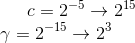

In [20]:
#C = np.logspace(-5, 15,num=21,base = 2.0)
#gamma = np.logspace(-15, 3, num=19,base = 2.0)
param_grid = [
        	{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
        	{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
        	 ]

Set up the SVM, which is Support Vector Classification(SVC). The SVC is based on libsvm and uses one-vs-one for multiclass classification. 

In [21]:
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc, param_grid) 

# Training SVM

Fit the the Model(clf) to the training data, for training:

In [22]:
clf = clf.fit(X_train, y_train)

Results from the Grid Search, for the best Model

SVM Best Estimator:

In [23]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVM Grid Scores:

In [24]:
d = clf.cv_results_
pd.DataFrame(d)#, orient='columns', dtype=None)
#pd.DataFrame(d.items())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,3.145000,0.168000,0.774510,1.000000,1,NaN,linear,"{u'kernel': u'linear', u'C': 1}",1,0.771429,1.000000,0.782609,1.000000,0.769231,1.000000,0.082414,0.000817,0.005859,0.000000
1,3.161667,0.170333,0.774510,1.000000,10,NaN,linear,"{u'kernel': u'linear', u'C': 10}",1,0.771429,1.000000,0.782609,1.000000,0.769231,1.000000,0.088096,0.003858,0.005859,0.000000
2,3.237333,0.167000,0.774510,1.000000,100,NaN,linear,"{u'kernel': u'linear', u'C': 100}",1,0.771429,1.000000,0.782609,1.000000,0.769231,1.000000,0.043492,0.002449,0.005859,0.000000
3,3.188333,0.202000,0.774510,1.000000,1000,NaN,linear,"{u'kernel': u'linear', u'C': 1000}",1,0.771429,1.000000,0.782609,1.000000,0.769231,1.000000,0.159073,0.043151,0.005859,0.000000
4,3.624667,0.183667,0.245098,0.250063,1,0.001,rbf,"{u'kernel': u'rbf', u'C': 1, u'gamma': 0.001}",11,0.242857,0.253731,0.246377,0.251852,0.246154,0.244604,0.218867,0.017211,0.001622,0.003935
5,3.582333,0.193000,0.245098,0.245106,1,0.0001,rbf,"{u'kernel': u'rbf', u'C': 1, u'gamma': 0.0001}",11,0.242857,0.246269,0.246377,0.244444,0.246154,0.244604,0.287407,0.025508,0.001622,0.000825
6,3.509667,0.193000,0.759804,1.000000,10,0.001,rbf,"{u'kernel': u'rbf', u'C': 10, u'gamma': 0.001}",9,0.785714,1.000000,0.753623,1.000000,0.738462,1.000000,0.183253,0.025781,0.019708,0.000000
7,3.226667,0.174000,0.254902,0.281827,10,0.0001,rbf,"{u'kernel': u'rbf', u'C': 10, u'gamma': 0.0001}",10,0.242857,0.291045,0.246377,0.266667,0.276923,0.287770,0.092737,0.004546,0.015129,0.010803
8,3.265333,0.186000,0.764706,1.000000,100,0.001,rbf,"{u'kernel': u'rbf', u'C': 100, u'gamma': 0.001}",7,0.771429,1.000000,0.768116,1.000000,0.753846,1.000000,0.096472,0.019799,0.007551,0.000000
9,3.205000,0.169333,0.769608,1.000000,100,0.0001,rbf,"{u'kernel': u'rbf', u'C': 100, u'gamma': 0.0001}",5,0.785714,1.000000,0.753623,1.000000,0.769231,1.000000,0.102101,0.000943,0.013247,0.000000


Save the Model:

In [26]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Testing SVM Model/Classifier

Testing the Model:

In [27]:
y_pred = clf.predict(X_test)

SVM Classification Report:

In [28]:
print classification_report(y_test, y_pred, target_names=["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"])

             precision    recall  f1-score   support

      Angry       0.74      0.82      0.78        17
    Disgust       1.00      0.92      0.96        24
       Fear       0.86      0.60      0.71        10
      Happy       0.93      1.00      0.96        27
    Neutral       0.67      0.71      0.69        14
        Sad       0.75      0.82      0.78        11
   Surprise       1.00      0.97      0.98        33

avg / total       0.89      0.88      0.88       136



SVM Confusion Matrix:

[[14  0  0  0  3  0  0]
 [ 1 22  0  1  0  0  0]
 [ 1  0  6  0  1  2  0]
 [ 0  0  0 27  0  0  0]
 [ 2  0  1  1 10  0  0]
 [ 1  0  0  0  1  9  0]
 [ 0  0  0  0  0  1 32]]


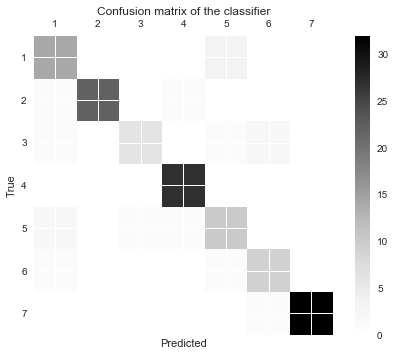

In [29]:
#TP|FP
#FN|TN
#print confusion_matrix(y_test, y_pred, labels=[1,2,3,4,5,6,7])#range(7))
labels = [1,2,3,4,5,6,7]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
pl.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()

SVM Accuracy Score:

In [30]:
acc = accuracy_score(y_test, y_pred, normalize=True)
print '{0:.2f}'.format(acc*100)

88.24


 # **End**